In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/Salary_Data.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
# this is a supervised machine learning
# target column here is salary. IT is continous. this will be prediction (linear regression)

In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
df['Salary'].head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [ ]:
df['Salary'].unique()

In [11]:
df['Salary'].nunique()

30

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

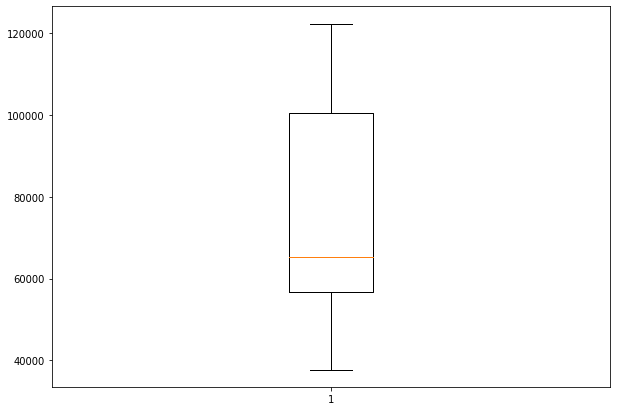

In [13]:
# box plot shows how the distibution looks like.
# 
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['Salary'])
plt.show()

(array([ 6., 11.,  2.,  4.,  7.]),
 array([ 37731.,  54663.,  71595.,  88527., 105459., 122391.]),
 <BarContainer object of 5 artists>)

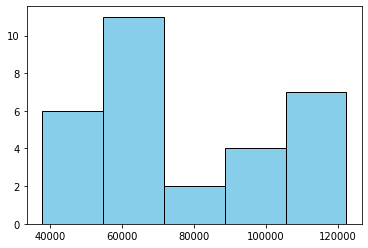

In [14]:
plt.hist(df['Salary'], bins=5, color='skyblue', edgecolor='black')

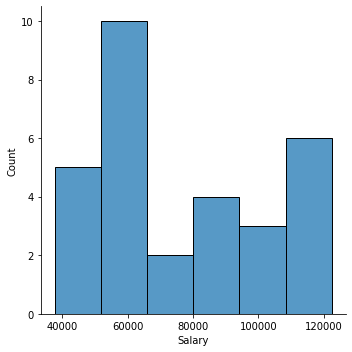

In [15]:
sns.displot(df['Salary'])
plt.show()

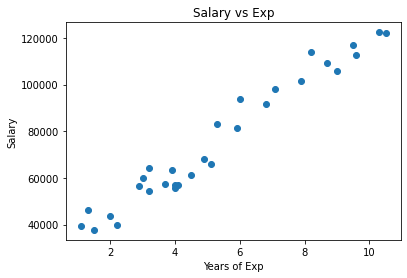

In [16]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.title('Salary vs Exp')
plt.xlabel('Years of Exp')
plt.ylabel('Salary')
plt.show()

In [17]:
corr = df.corr(method = 'pearson')

In [18]:
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [19]:
lst = [1, 2, 3, 4, 5]
print(lst[:4])
print(lst[4:])

[1, 2, 3, 4]
[5]


In [20]:
# X = df['YearsExperience']
# y = df['Salary']
X = df.iloc[:,:1]
y = df.iloc[:, 1:]

In [21]:
X.shape, y.shape

((30, 1), (30, 1))

In [22]:
type(X)

pandas.core.frame.DataFrame

In [23]:
# !pip install sklearn

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=200)

In [25]:
df.shape

(30, 2)

In [26]:
X_train.shape, X_val.shape

((24, 1), (6, 1))

In [27]:
y_train.shape, y_val.shape

((24, 1), (6, 1))

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [29]:
# Fit regression model (using the natural log of one of the regressors)
results = sm.OLS(y_train, X_train).fit()

In [30]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              847.7
Date:                Sun, 21 Jul 2024   Prob (F-statistic):                    1.18e-19
Time:                        19:35:23   Log-Likelihood:                         -260.99
No. Observations:                  24   AIC:                                      524.0
Df Residuals:                      23   BIC:                                      525.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

eval_env: 1


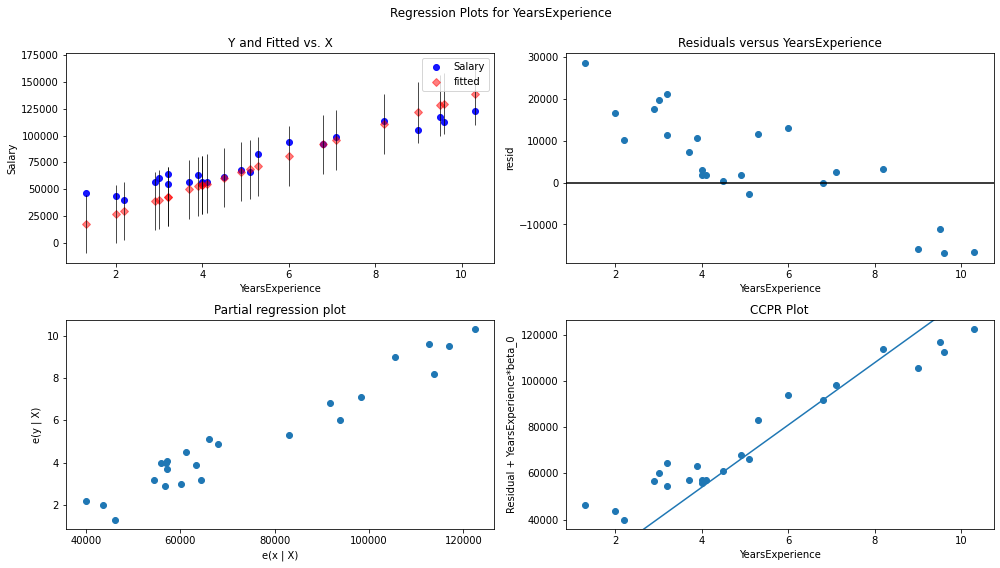

In [31]:
# modify figure size 
fig = plt.figure(figsize=(14, 8)) 
  
# creating regression plots 
fig = sm.graphics.plot_regress_exog(results, 
                                    'YearsExperience', 
                                    fig=fig) 

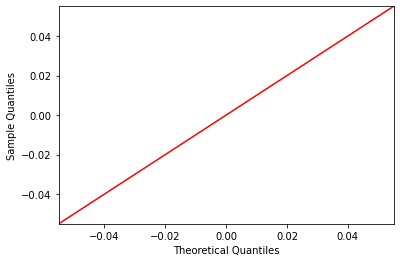

In [41]:
# this was not covered in video but this is quartile-quartile plot of residuals.
import pylab as py
y_hat = results.predict(X_train)
residuals = y_hat - y_train
sm.qqplot(residuals, line ='45') 
py.show() 

In [32]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred_train = reg.predict(X_train)
y_pred_val = reg.predict(X_val)

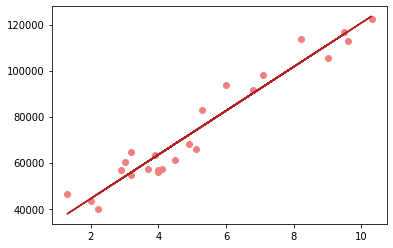

In [34]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color='firebrick')
plt.show()

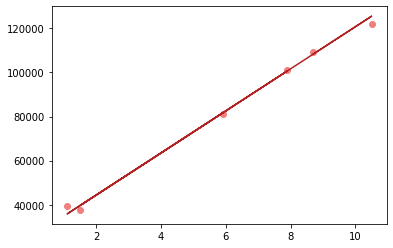

In [35]:
plt.scatter(X_val, y_val, color = 'lightcoral')
plt.plot(X_val, y_pred_val, color='firebrick')
plt.show()

In [36]:
reg.coef_

array([[9541.24142669]])

In [37]:
reg.intercept_

array([25326.76297401])

https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=The%20coefficient%20of%20determination%2C%20or,line%20approximates%20the%20actual%20data.

In [38]:
from sklearn.metrics import r2_score
r2_score(y_pred_train, y_train)

0.9356816776530104

In [39]:
r2_score(y_pred_val, y_val)

0.995498689794974